In [10]:
import numpy as np 
import pandas as pd
from scipy.stats import wasserstein_distance, ks_2samp
import matplotlib.pyplot as plt
from importlib import reload
import implementation as imp

reload(imp)


<module 'implementation' from '/home/yassine/test/GearedCameraInC/src/analyse/implementation.py'>

# Definition des histogrammes (Echantillon prit à titre indicatif)
### Histogramme temoin  (Sample)

In [3]:
sample = np.array([0,141,132,128,120,126,130,137,137,140,139,140,138,135,134,139,139,146,148,148,149,149,149,149,148,145,146,149,149,149,149,149,149,149,149,149,149,149,75,144,142,132,129,127,126,126,126,125,124,124,124,124,124,123,117,113,106,97,88,87,82,68,56,42,32,26,28,29,29,28,33,30,27,22,25,30,31,30,29,2,33,36,39,45,50,55,64,61,53,50,50,48,48,48,51,50,45,42,42,44,52,65,72,75,82,104,118,125,127,126,122,140,67,139,141,144,145,143,145,146,147,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149]
)

### Histogramme issue d'une partie de visage

In [4]:
histogram = np.array([0,149,149,149,140,130,122,122,124,124,129,128,134,134,129,125,125,124,124,118,118,109,111,117,124,120,118,118,125,124,128,128,139,143,147,149,76,149,75,147,147,147,147,147,147,147,147,147,147,147,147,147,147,146,146,146,145,145,145,143,143,142,139,135,129,122,125,125,126,125,122,117,102,98,92,89,87,80,62,41,34,33,33,33,33,33,41,43,46,46,49,50,50,48,44,42,2,36,37,38,48,51,55,60,63,62,60,52,50,119,43,48,44,51,54,56,58,60,75,85,93,97,106,120,125,128,131,128,127,129,133,134,133,133,137,140,142,142,143,143,145,144,144,145,147,148,148,149,149,149])

### Histogramme issue de bruit

In [5]:
false_histo = np.array([0,141,144,147,148,142,140,135,136,139,149,135,133,131,128,123,121,129,138,142,144,144,142,145,144,143,143,141,142,146,144,144,143,141,145,145,146,146,74,138,132,130,120,111,102,102,103,102,100,106,110,107,106,104,97,94,96,95,94,89,87,80,87,86,84,88,93,98,103,102,100,89,82,79,83,92,100,91,101,108,114,117,116,114,130,106,106,103,97,93,89,87,82,74,70,70,78,80,86,88,89,91,89,86,87,86,91,93,96,98,100,99,63,111,115,117,122,129,135,136,133,134,130,127,122,117,109,103,0,110,113,113,113,116,119,118,116,114,114,115,118,118,114,109,106,109,112,109,100,96]
)

# Analyse et representation graphique

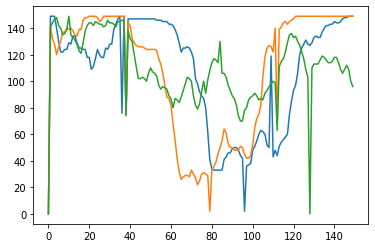

In [6]:
plt.plot(histogram)
plt.plot(sample)
plt.plot(false_histo)

# Etude graphique sur les fonctions de repartition des deux histogramme

Afin de souligner la correlation se trouvant entre les deux histogram nous effectuons plusieurs calculs sur chaque fonction de repartition :

<ol>
    <li> Calcul de la distance de Wasserstein </li>
    <li> Calcul de la distance de Kolmogorov-Smirnov </li>
</ol>
## Fonction de repartition de l'histogramme temoin (Sample)

En théorie des probabilités, la fonction de répartition, ou fonction de distribution cumulative, d'une variable aléatoire réelle X est la fonction $F_X$ qui, à tout réel x, associe la probabilité d’obtenir une valeur inférieure ou égale :

 $$F_X(x) = P(X \leq x )$$ 

## Wasserstein

La distance de Wasserstein calcul l'air maximal entre la premiere fonction et la deuxieme. Plus l'air est important et plus les courbes sont statistiquement éloigné. 


## Kolmogorov Smirnov

Le test de Kolmogorov-Smirnov resulte à une recherche de la plus grande distance entre les 2 fonctions. On peut alors determiner une p_value qui selon sa valeur nous permet de rejetter ou non l'hypothese null. H0

Elle peut etre calculer en faisant une comparaison des histogrammes en tout point puis en prenant le maxium... C'est encore à voir

Wasserstein_distance = 5.813333333333333
Kolmogorov-Smirnov = (0.24666666666666667,0.0002040624742534371)


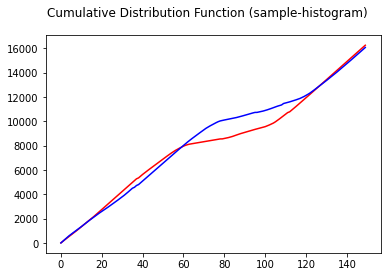

In [7]:
plt.plot(np.cumsum(sample),'r')
plt.plot(np.cumsum(histogram) ,'b')
plt.suptitle("Cumulative Distribution Function (sample-histogram)")
print("Wasserstein_distance = {}".format(wasserstein_distance(sample, histogram)))
stat, p_value = ks_2samp(sample, histogram)
print("Kolmogorov-Smirnov = ({},{})".format(stat, p_value))

wasserstein_distance = 23.39333333333333
Kolmogorov-Smirnov = (0.24666666666666667,2.3292369663354756e-06)


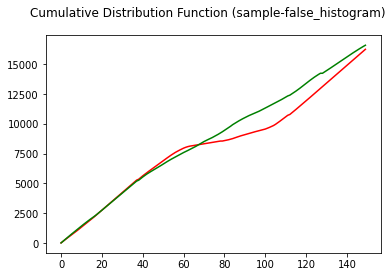

In [8]:
plt.plot(np.cumsum(sample), 'r')
plt.plot(np.cumsum(false_histo), '-g')
plt.suptitle("Cumulative Distribution Function (sample-false_histogram)")
print("wasserstein_distance = {}".format(wasserstein_distance(sample, false_histo)))
tat, p_value = ks_2samp(sample, false_histo)
print("Kolmogorov-Smirnov = ({},{})".format(stat, p_value))

## Tester vos fonctions ici (TDD)


In [9]:

# Wasserstein Test
assert int(imp.wasserstein(sample,sample)) == 0
assert int(imp.wasserstein(sample, false_histo)) == 23
assert int(imp.wasserstein(sample, histogram)) == 5

# Kolmogorov
# Do ur own tests

AssertionError: 